In [3]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import json
import os
import shutil 
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import cv2


In [4]:
df = pd.read_csv('df_total.csv', index_col=0)
df['gender'] = df['gender'].fillna('Мужской')
cols = ['Асимметрия челюсти', 'Высота бровей', 'Наклон глаз',
       'Полнота верхней губы', 'Полнота нижней губы',
       'Асимметрия размера глаз', 'Ширина посадки глаз', 'Скулы',
       'Форма головы', 'Верхнее веко', 'Асимметрия брови', 'Наклон бровей',
       'Размер рта', 'Асимметрия наклона глаз', 'Асимметрия носа',
       'Размер глаз', 'Оттопыренность ушей', 'Ширина челюсти', 'Уголки рта',
       ]

# for col in tqdm(cols):
#     df[col] = (df[col] - df[col].quantile(0.01)) / (df[col].quantile(0.99) - df[col].quantile(0.001))
    
df['Категория'] = df['fraud'].replace({True: 'Мошенник', False: 'Не мошенник'})
features = ['Асимметрия челюсти', 'Высота бровей', 'Наклон глаз',
           'Полнота верхней губы', 'Полнота нижней губы',
           'Асимметрия размера глаз', 'Ширина посадки глаз', 'Скулы',
           'Форма головы', 'Верхнее веко', 'Асимметрия брови', 'Наклон бровей',
           'Размер рта', 'Асимметрия наклона глаз', 'Асимметрия носа',
           'Размер глаз', 'Оттопыренность ушей', 'Ширина челюсти', 'Уголки рта',
           ]

anketas = ['source', 'childs', 'education', 'marital_status', 'job']

ga = ['age', 'gender']

In [5]:
q = df[df['Категория'] == 

0        Не мошенник
1        Не мошенник
2           Мошенник
3        Не мошенник
4           Мошенник
            ...     
35083    Не мошенник
35084    Не мошенник
35085    Не мошенник
35086    Не мошенник
35087    Не мошенник
Name: Категория, Length: 35088, dtype: object

In [41]:
from scipy import stats

norm = pd.DataFrame(index=features)
k2, p = stats.normaltest(df[df['Категория'] == 'Мошенник'][features])#.pvalue
norm.loc[features, 'p_value Мошенники'] = p.tolist()
norm['Соответствие нормальному распределению Мошенники'] = norm['p_value Мошенники'] < 1e-3

k2, p = stats.normaltest(df[df['Категория'] == 'Не мошенник'][features])#.pvalue
norm.loc[features, 'p_value Добросовестные'] = p.tolist()
norm['Соответствие нормальному распределению Добросовестные'] = norm['p_value Добросовестные'] < 1e-3
norm

,p_value Мошенники,Соответствие нормальному распределению Мошенники,p_value Добросовестные,Соответствие нормальному распределению Добросовестные
Асимметрия челюсти,0.000000e+00,True,0.000000e+00,True
Высота бровей,2.068674e-172,True,0.000000e+00,True
Наклон глаз,1.625180e-10,True,1.585317e-34,True
Полнота верхней губы,1.228904e-14,True,1.711407e-124,True
Полнота нижней губы,8.168376e-02,False,5.850012e-21,True
Асимметрия размера глаз,1.043540e-63,True,0.000000e+00,True
Ширина посадки глаз,1.965453e-48,True,0.000000e+00,True
Скулы,1.158828e-232,True,0.000000e+00,True
Форма головы,2.988957e-64,True,0.000000e+00,True
Верхнее веко,0.000000e+00,True,0.000000e+00,True


In [48]:
norm.to_excel('plots/Нормальное распределение.xls')

/tmp/ipykernel_50276/3022398321.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  norm.to_excel('plots/Нормальное распределение.xls')


In [47]:
!pip install xlwt

     |████████████████████████████████| 99 kB 535 kB/s eta 0:00:01


<AxesSubplot:>

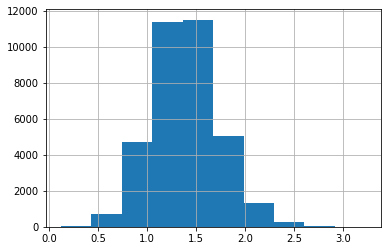

In [44]:
df['Полнота верхней губы'].hist()